# Data Exploration

In [1]:
from PIL import Image
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter

In [2]:
dataset_root = '../datasets/final/train'
paths = list(Path(dataset_root).glob('*.jpg'))
labels = list(map(lambda x: os.path.basename(x).split('.')[0], paths))
print('#Image:', len(paths))
print(Counter(labels))

#Image: 25000
Counter({'cat': 12500, 'dog': 12500})


# Image Visualisation

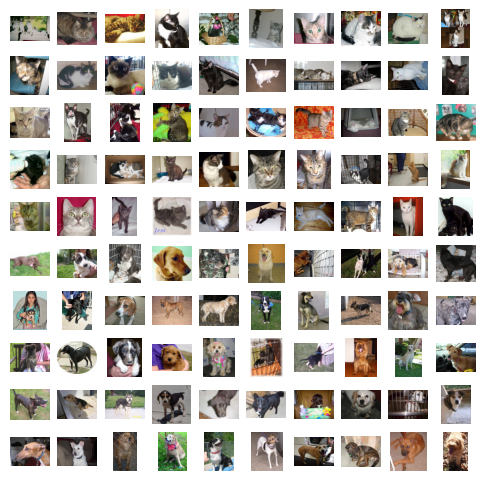

In [3]:
fig, axs = plt.subplots(10, 10, figsize=(6, 6))
for i in range(50):
    axs[i // 10][i % 10].imshow(Image.open(np.random.choice(paths[:12500])).convert('RGB'))
    axs[i // 10][i % 10].axis('off')

for i in range(50, 100):
    axs[i // 10][i % 10].imshow(Image.open(np.random.choice(paths[12500:])).convert('RGB'))
    axs[i // 10][i % 10].axis('off')

plt.show()

# Image Spec. Distributions

In [4]:
df = []
for path in paths:
    df.append(Image.open(path).size)
df = pd.DataFrame(df, columns=['width', 'height'])

In [5]:
df['w/h']=df['width']/df['height']
df.describe()

,width,height,w/h
count,25000.00000,25000.000000,25000.000000
mean,404.09904,360.478080,1.157199
std,109.03793,97.019959,0.291914
min,42.00000,32.000000,0.306613
25%,323.00000,301.000000,0.929851
50%,447.00000,374.000000,1.270944
75%,499.00000,421.000000,1.336898
max,1050.00000,768.000000,5.909091
